## Handling Imbalanced Classification Using Neural Network

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ujwal-sah/my_tutorials/master/Feature%20Engineering/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df['Class'].value_counts(normalize=True)

0    0.99824
1    0.00176
Name: Class, dtype: float64

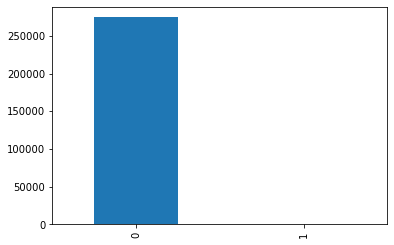

In [4]:
df['Class'].value_counts().plot(kind="bar")

In [5]:
# Independent and Dependent Features
X = df.iloc[:, 1:30]
y = df.Class

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
y_train.value_counts()

0    192153
1       347
Name: Class, dtype: int64

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [10]:
n_inputs = len(X.columns)
n_inputs

29

### Trial-1: Simple ANN

In [11]:
#trial-1: A simple ANN
#instantiate

#i.define model
model = Sequential()
#first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation="relu",
                kernel_initializer='he_uniform'))
#output layer
model.add(Dense(1, activation='sigmoid'))

#ii.compile the model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [12]:
#fit
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
6016/6016 [==============================] - 4s 696us/step - loss: 0.0575
Epoch 2/10
6016/6016 [==============================] - 4s 685us/step - loss: 0.0137
Epoch 3/10
6016/6016 [==============================] - 4s 702us/step - loss: 0.0119
Epoch 4/10
6016/6016 [==============================] - 5s 816us/step - loss: 0.0104
Epoch 5/10
6016/6016 [==============================] - 5s 758us/step - loss: 0.0098
Epoch 6/10
6016/6016 [==============================] - 4s 645us/step - loss: 0.0098
Epoch 7/10
6016/6016 [==============================] - 4s 681us/step - loss: 0.0078
Epoch 8/10
6016/6016 [==============================] - 4s 630us/step - loss: 0.0087
Epoch 9/10
6016/6016 [==============================] - 4s 741us/step - loss: 0.0098
Epoch 10/10
6016/6016 [==============================] - 4s 693us/step - loss: 0.0094


In [25]:
#predict
y_pred1 = model.predict(X_test)
y_pred1[0:10]

array([[2.2045384e-05],
       [1.2552738e-04],
       [1.7958879e-04],
       [4.9224754e-14],
       [3.2531629e-05],
       [5.3954282e-05],
       [3.1901314e-07],
       [1.1884587e-05],
       [1.0035772e-07],
       [5.2755922e-07]], dtype=float32)

In [27]:
#roc_auc
from sklearn.metrics import roc_auc_score, accuracy_score
print(roc_auc_score(y_test,y_pred1))

0.9233224808354613


### Trial-2: Weighted ANN

In [28]:
weights_assigned = {0:1, 1:550}

In [29]:
# define model
model = Sequential()
# first hidden layer and visible layer
model.add(Dense(50, input_dim=n_inputs, activation='relu', kernel_initializer='he_uniform'))
# output layer
model.add(Dense(1, activation='sigmoid'))
# compile with loss and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

In [30]:
#fit with weights
model.fit(X_train,y_train,class_weight=weights_assigned,epochs=10)

Epoch 1/10
6016/6016 [==============================] - 4s 724us/step - loss: 5.2472
Epoch 2/10
6016/6016 [==============================] - 4s 724us/step - loss: 2.8768
Epoch 3/10
6016/6016 [==============================] - 5s 785us/step - loss: 3.1306
Epoch 4/10
6016/6016 [==============================] - 5s 800us/step - loss: 2.9546
Epoch 5/10
6016/6016 [==============================] - 5s 767us/step - loss: 2.7169
Epoch 6/10
6016/6016 [==============================] - 5s 798us/step - loss: 2.1730
Epoch 7/10
6016/6016 [==============================] - 4s 737us/step - loss: 2.4104
Epoch 8/10
6016/6016 [==============================] - 4s 718us/step - loss: 3.6165
Epoch 9/10
6016/6016 [==============================] - 5s 758us/step - loss: 2.9787
Epoch 10/10
6016/6016 [==============================] - 5s 773us/step - loss: 3.4540


In [31]:
#predict
y_pred=model.predict(X_test)
#roc_auc
roc_auc_score(y_test,y_pred)

0.9764893810389489